In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('D:/ML/comp/Iris Dataset.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
class K_Means:
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    #print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break

    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

In [5]:
df.info() # no null data
df['Species'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Accuracy:  91.11111111111111 %


C:\Users\hp\AppData\Local\Temp\ipykernel_21396\3823621298.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcpy[column] = (dfcpy[column] - dfcpy[column].min()) / (dfcpy[column].max() - dfcpy[column].min())


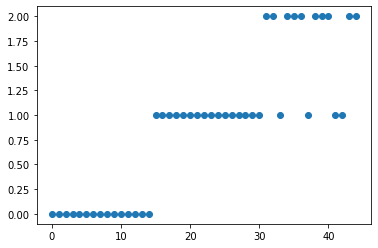

In [6]:
features = ['SepalLengthCm','SepalWidthCm','PetalWidthCm','PetalLengthCm','Species']
f = ['SepalLengthCm','SepalWidthCm','PetalWidthCm','PetalLengthCm']
df["Species"] = df["Species"].replace({"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2})
dfcpy = df[features]

for column in f:
    dfcpy[column] = (dfcpy[column] - dfcpy[column].min()) / (dfcpy[column].max() - dfcpy[column].min())

training_data = dfcpy.sample(frac=0.7, random_state=41)
testing_data = dfcpy.drop(training_data.index)

X_train = training_data.iloc[:,:-1].values
y_train = training_data.iloc[:,-1].values

X_test = testing_data.iloc[:,:-1].values
Y_test = testing_data.iloc[:,-1].values

mdl = K_Means()
mdl.__init__(k=3)
mdl.fit(X_train)

y_pred = np.array([])
for i in range(len(Y_test)):
    y_pred = np.append(y_pred,mdl.predict(X_test[i]))

accuracy = 0
for i in range(len(Y_test)):
    if Y_test[i]==y_pred[i]:
        accuracy+=1
accuracy= (accuracy/len(Y_test))*100
print('Accuracy: ',accuracy,'%')
plt.scatter([i for i in range(len(Y_test))],y_pred)

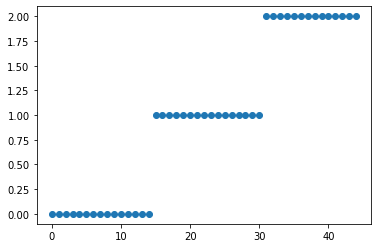

In [7]:
plt.scatter([i for i in range(len(Y_test))],Y_test)

     SepalLengthCm  SepalWidthCm  PetalWidthCm  PetalLengthCm
0        -0.897674      1.028611     -1.308593      -1.336794
1        -1.139200     -0.124540     -1.308593      -1.336794
2        -1.380727      0.336720     -1.308593      -1.393470
3        -1.501490      0.106090     -1.308593      -1.280118
4        -1.018437      1.259242     -1.308593      -1.336794
..             ...           ...           ...            ...
145       1.034539     -0.124540      1.443121       0.816888
146       0.551486     -1.277692      0.918985       0.703536
147       0.793012     -0.124540      1.050019       0.816888
148       0.430722      0.797981      1.443121       0.930239
149       0.068433     -0.124540      0.787951       0.760212

[150 rows x 4 columns]
Eigenvectors:  [[ 0.52237162 -0.37231836 -0.72101681 -0.26199559]
 [-0.26335492 -0.92555649  0.24203288  0.12413481]
 [ 0.56561105 -0.06541577  0.6338014  -0.52354627]
 [ 0.58125401 -0.02109478  0.14089226  0.80115427]]
Eigenvalues:

C:\Users\hp\AppData\Local\Temp\ipykernel_21396\942290237.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_data[col] = (scaled_data[col]-scaled_data[col].mean())/scaled_data[col].std() #data normalisation
C:\Users\hp\AppData\Local\Temp\ipykernel_21396\942290237.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mean_subtracted[col] = mean_subtracted[col]-mean_subtracted[col].mean()


Text(0.5, 0, 'Magnitude of the eigenvalue')

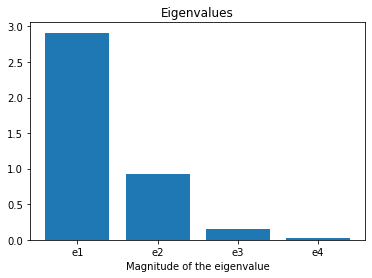

In [8]:
def data_normalisation(scaled_data):
    for col in scaled_data.columns: #iterate over each column
        scaled_data[col] = (scaled_data[col]-scaled_data[col].mean())/scaled_data[col].std() #data normalisation 
    return scaled_data

dfcpy2 = df[f]
scaled_data = data_normalisation(dfcpy2)
print(scaled_data)

def covariance_calculation(mean_subtracted):
    #calcualte covariance amongst scaled values
    for col in mean_subtracted.columns:
        mean_subtracted[col] = mean_subtracted[col]-mean_subtracted[col].mean()
        
    return np.dot(mean_subtracted.T,mean_subtracted)/(len(mean_subtracted) - 1)
cov_calc = covariance_calculation(scaled_data) #calling the above function

from numpy.linalg import eig
w,v=eig(cov_calc)

print('Eigenvectors: ',v)
print('Eigenvalues: ',w)
plt.bar(["e" + str(i+1) for i in range(len(w))], w)
plt.title("Eigenvalues")
plt.xlabel("Magnitude of the eigenvalue")

In [9]:
useful_pc = v[:,:-1] #keeping only the first 3 eigenvectors
principle_data = np.dot(dfcpy2.values, useful_pc)#dot product of the two terms
principle_data = pd.DataFrame(data=principle_data,columns=['e1','e2','e3'])
principle_data.head(10)

,e1,e2,e3
0,-2.256981,-0.504015,-0.121536
1,-2.079459,0.653216,-0.226492
2,-2.360044,0.317414,0.051308
3,-2.296504,0.573447,0.098530
4,-2.380802,-0.672514,0.021356
5,-2.063623,-1.513478,0.030582
6,-2.437545,-0.074314,0.341055
7,-2.226383,-0.246787,-0.082299
8,-2.334138,1.091490,0.153050
9,-2.181368,0.447131,-0.245736
